In [1]:
import json
import pandas as pd
from pathlib import Path
from pprint import pprint
import datetime
import time
import numpy as np
import matplotlib as plt

import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
#path_results = Path('/media/discoD/models/elmo/ner/results_20_epochs_ibm')
#path_results = Path('/media/discoD/models/elmo/ner/results_1_epoch_harem_all_combinations')
path_results = Path('/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/')

In [3]:
for folder in path_results.iterdir():
    print(folder)

/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft2_ELMo
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft2_ELMo+CNN
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft2_ELMo+CNN+Embeddings
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft2_ELMo+Embeddings
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft_ELMo
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft_ELMo+CNN
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft_ELMo+CNN+Embeddings
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem-ft_ELMo+Embeddings
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem_ELMo
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem_ELMo+CNN
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem_ELMo+CNN+Embeddings
/media/discoD/models/elmo/ner/results_5_epochs_harem_mestrado/harem_ELMo+Embeddings


In [4]:
configs = dict()
metrics = dict()
for model_folder in path_results.iterdir():
    if 'Embeddings' in model_folder.name:
        #print('Reading embeddings folder from %s' % model_folder.name)
        for embedding_folder in model_folder.iterdir():
            #print('Reading trainings folder from %s' % embedding_folder.name)
            for training_folder in embedding_folder.iterdir():
                key = embedding_folder.name + '_' + training_folder.name
                #print('Reading files from %s' % key)
                has_metrics = False
                for results_file in training_folder.iterdir():
                    if results_file.name.endswith('.json'):
                        #print('Parsing data from %s' % results_file.name)
                        if results_file.name.startswith('config'):
                            configs[key] = json.loads(results_file.read_bytes())
                        elif results_file.name.startswith('metrics.'):
                            metrics[key] = json.loads(results_file.read_bytes())
                            has_metrics = True
                if not has_metrics:
                    print('metrics.json not found for %s' % key)
                    del configs[key]
    else:
        #print('Reading trainings folder from %s' % model_folder.name)
        for training_folder in model_folder.iterdir():
            key = training_folder.name
            #print('Reading files from %s' % key)
            has_metrics = False
            for results_file in training_folder.iterdir():
                if results_file.name.endswith('.json'):
                    #print('Parsing data from %s' % results_file.name)
                    if results_file.name.startswith('config'):
                        configs[key] = json.loads(results_file.read_bytes())
                    elif results_file.name.startswith('metrics.'):
                        metrics[key] = json.loads(results_file.read_bytes())
                        has_metrics = True
            if not has_metrics:
                print('metrics.json not found for %s' % key)
                del configs[key]
print(len(metrics))
print(len(configs))

metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_4_0
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_skip_0_3
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_0_0
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_0_1
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_0_2
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_0_3
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_1_0
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_1_1
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_1_2
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_1_3
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_2_0
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_2_1
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_2_2
metrics.json not found for harem-ft2_ELMo+Embeddings_fasttext_cbow_2_3
metric

2014
2014


In [5]:
def get_seconds(time_str):
    x = time.strptime(time_str,'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
def get_average_epoch_duration(metrics):
    seconds = get_seconds(metrics['training_duration'])
    training_epochs = metrics['training_epochs'] + 1
    return seconds / training_epochs

In [6]:
TRAINING_ID = 'Training_ID'
SCENARIO = 'Scenario'
MODEL = 'Model'
REPRESENTATION = 'Representation'
EMBEDDING = 'Embedding'
EMBEDDING_TYPE = 'Embedding_Type'
BATCH_SIZE = 'Batch_Size'
ELMO_DROPOUT = 'ELMo_Dropout'
TRAINING_NUMBER = 'Training_Number'
EXECUTION_NUMBER = 'Execution_Number'
BEST_EPOCH = 'Best_Epoch'
TRAINING_EPOCHS = 'Training_Epochs'
TRAINING_DURATION = 'Training_Duration'
TOTAL_DURATION = 'Total_Duration(s)'
AVERAGE_EPOCH_DURATION = 'Average_Epoch_Duration(s)'
TRAINING_ACCURACY = 'Training_Accuracy'
TRAINING_ACCURACY_TOP3 = 'Training_Accuracy_Top-3'
TRAINING_PRECISION = 'Training_Precision'
TRAINING_RECALL = 'Training_Recall'
TRAINING_F1_MEASURE = 'Training_F1-Measure'
TRAINING_LOSS = 'Training_Loss'
BEST_VALIDATION_ACCURACY = 'Best_Validation_Accuracy'
BEST_VALIDATION_ACCURACY_TOP3 = 'Best_Validation_Accuracy_Top-3'
BEST_VALIDATION_PRECISION = 'Best_Validation_Precision'
BEST_VALIDATION_RECALL = 'Best_Validation_Recall'
BEST_VALIDATION_F1_MEASURE = 'Best_Validation_F1-Measure'
BEST_VALIDATION_LOSS = 'Best_Validation_Loss'
TEST_ACCURACY = 'Test_Accuracy'
TEST_ACCURACY_TOP3 = 'Test_Accuracy_Top-3'
TEST_PRECISION = 'Test_Precision'
TEST_RECALL = 'Test_Recall'
TEST_F1_MEASURE = 'Test_F1_Measure'
TEST_LOSS = 'Test_Loss'
columns = [TRAINING_ID, MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE, TRAINING_NUMBER, EXECUTION_NUMBER, BEST_EPOCH, TRAINING_EPOCHS, TRAINING_DURATION, TOTAL_DURATION, AVERAGE_EPOCH_DURATION, TRAINING_ACCURACY, TRAINING_ACCURACY_TOP3, TRAINING_PRECISION, TRAINING_RECALL, TRAINING_F1_MEASURE, TRAINING_LOSS, BEST_VALIDATION_ACCURACY, BEST_VALIDATION_ACCURACY_TOP3, BEST_VALIDATION_PRECISION, BEST_VALIDATION_RECALL, BEST_VALIDATION_F1_MEASURE, BEST_VALIDATION_LOSS, TEST_ACCURACY, TEST_ACCURACY_TOP3, TEST_PRECISION, TEST_RECALL, TEST_F1_MEASURE, TEST_LOSS]
columns

['Training_ID',
 'Model',
 'Representation',
 'Embedding',
 'Embedding_Type',
 'Training_Number',
 'Execution_Number',
 'Best_Epoch',
 'Training_Epochs',
 'Training_Duration',
 'Total_Duration(s)',
 'Average_Epoch_Duration(s)',
 'Training_Accuracy',
 'Training_Accuracy_Top-3',
 'Training_Precision',
 'Training_Recall',
 'Training_F1-Measure',
 'Training_Loss',
 'Best_Validation_Accuracy',
 'Best_Validation_Accuracy_Top-3',
 'Best_Validation_Precision',
 'Best_Validation_Recall',
 'Best_Validation_F1-Measure',
 'Best_Validation_Loss',
 'Test_Accuracy',
 'Test_Accuracy_Top-3',
 'Test_Precision',
 'Test_Recall',
 'Test_F1_Measure',
 'Test_Loss']

In [7]:
def get_training_data_from_id(training_id, config):
    data = training_id.split('_')
    print(data)
    if len(data) == 4:
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: 'No', EMBEDDING_TYPE: 'No', TRAINING_NUMBER: data[2], EXECUTION_NUMBER: data[3]}
    elif len(data) == 5:
        #GloVe
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', TRAINING_NUMBER: data[3], EXECUTION_NUMBER: data[4]}
    elif len(data) == 6:
        embedding_type = data[3] if data[2] != 'glove' else 'No'
        return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: embedding_type, TRAINING_NUMBER: data[4], EXECUTION_NUMBER: data[5]}
    else:
        print('Check id: %s' % training_id)

In [8]:
training_data = []
for training_id, config in configs.items():
    training_metrics = metrics[training_id]
    data = get_training_data_from_id(training_id, config)
    data[TRAINING_ID] = training_id
    data[BEST_EPOCH] = training_metrics['best_epoch'] if training_metrics else None
    data[TRAINING_EPOCHS] = training_metrics['training_epochs'] + 1 if training_metrics else None
    data[TRAINING_DURATION] = training_metrics['training_duration'] if training_metrics else None
    data[TOTAL_DURATION] = get_seconds(training_metrics['training_duration']) if training_metrics else None
    data[AVERAGE_EPOCH_DURATION] = get_average_epoch_duration(training_metrics) if training_metrics else None
    data[TRAINING_ACCURACY] = training_metrics['training_accuracy'] if training_metrics else None
    data[TRAINING_ACCURACY_TOP3] = training_metrics['training_accuracy3'] if training_metrics else None
    data[TRAINING_PRECISION] = training_metrics['training_precision-overall'] if training_metrics else None
    data[TRAINING_RECALL] = training_metrics['training_recall-overall'] if training_metrics else None
    data[TRAINING_F1_MEASURE] = training_metrics['training_f1-measure-overall'] if training_metrics else None
    data[TRAINING_LOSS] = training_metrics['training_loss'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY] = training_metrics['best_validation_accuracy'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY_TOP3] = training_metrics['best_validation_accuracy3'] if training_metrics else None
    data[BEST_VALIDATION_PRECISION] = training_metrics['best_validation_precision-overall'] if training_metrics else None
    data[BEST_VALIDATION_RECALL] = training_metrics['best_validation_recall-overall'] if training_metrics else None
    data[BEST_VALIDATION_F1_MEASURE] = training_metrics['best_validation_f1-measure-overall'] if training_metrics else None
    data[BEST_VALIDATION_LOSS] = training_metrics['best_validation_loss'] if training_metrics else None
    data[TEST_ACCURACY] = training_metrics['test_accuracy'] if training_metrics else None
    data[TEST_ACCURACY_TOP3] = training_metrics['test_accuracy3'] if training_metrics else None
    data[TEST_PRECISION] = training_metrics['test_precision-overall'] if training_metrics else None
    data[TEST_RECALL] = training_metrics['test_recall-overall'] if training_metrics else None
    data[TEST_F1_MEASURE] = training_metrics['test_f1-measure-overall'] if training_metrics else None
    data[TEST_LOSS] = training_metrics['test_loss'] if training_metrics else None
    training_data.append(data)

['harem-ft2', 'ELMo', '3', '2']
['harem-ft2', 'ELMo', '0', '0']
['harem-ft2', 'ELMo', '0', '1']
['harem-ft2', 'ELMo', '0', '2']
['harem-ft2', 'ELMo', '0', '3']
['harem-ft2', 'ELMo', '0', '4']
['harem-ft2', 'ELMo', '1', '0']
['harem-ft2', 'ELMo', '1', '1']
['harem-ft2', 'ELMo', '1', '2']
['harem-ft2', 'ELMo', '1', '3']
['harem-ft2', 'ELMo', '1', '4']
['harem-ft2', 'ELMo', '2', '0']
['harem-ft2', 'ELMo', '2', '1']
['harem-ft2', 'ELMo', '2', '2']
['harem-ft2', 'ELMo', '2', '3']
['harem-ft2', 'ELMo', '3', '0']
['harem-ft2', 'ELMo', '3', '1']
['harem-ft2', 'ELMo', '3', '3']
['harem-ft2', 'ELMo', '4', '0']
['harem-ft2', 'ELMo', '4', '1']
['harem-ft2', 'ELMo', '4', '2']
['harem-ft2', 'ELMo', '4', '3']
['harem-ft2', 'ELMo', '5', '0']
['harem-ft2', 'ELMo', '5', '1']
['harem-ft2', 'ELMo', '5', '2']
['harem-ft2', 'ELMo', '5', '3']
['harem-ft2', 'ELMo', '6', '0']
['harem-ft2', 'ELMo', '6', '1']
['harem-ft2', 'ELMo', '6', '2']
['harem-ft2', 'ELMo', '6', '3']
['harem-ft2', 'ELMo', '7', '0']
['harem-

['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '3', '3']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '3', '4']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '4', '0']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '4', '1']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '4', '2']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '4', '3']
['harem', 'ELMo+Embeddings', 'fasttext', 'skip', '4', '4']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '4', '4']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '5', '0']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '5', '1']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '5', '2']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '5', '3']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '5', '4']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '6', '0']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '6', '1']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '6', '2']
['harem', 'ELMo+Embeddings', 'fasttext', 'cbow', '6', '3

In [9]:
pd.set_option('display.max_columns', 1000)
training_data_df = pd.DataFrame(training_data, columns=columns)
training_data_df = training_data_df[(training_data_df[TRAINING_NUMBER]).astype(int) == 0]
training_data_df 

,Training_ID,Model,Representation,Embedding,Embedding_Type,Training_Number,Execution_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
1,harem-ft2_ELMo_0_0,harem-ft2,ELMo,No,No,0,0,3,5,00:04:58,298.0,59.6,0.987674,0.988760,0.869790,0.861111,0.865429,26.584419,0.978582,0.980876,0.800000,0.806122,0.803050,51.939048,0.977576,0.979377,0.813548,0.793990,0.803650,55.627695
2,harem-ft2_ELMo_0_1,harem-ft2,ELMo,No,No,0,1,3,5,00:04:50,290.0,58.0,0.987797,0.988861,0.874315,0.861111,0.867663,26.680440,0.978800,0.981314,0.810256,0.806122,0.808184,51.726150,0.976931,0.978882,0.813495,0.784975,0.798980,57.563143
3,harem-ft2_ELMo_0_2,harem-ft2,ELMo,No,No,0,2,3,5,00:04:49,289.0,57.8,0.987786,0.988827,0.874521,0.860841,0.867627,27.220980,0.977380,0.980002,0.794937,0.801020,0.797967,52.209078,0.977456,0.979377,0.824513,0.790651,0.807227,58.546175
4,harem-ft2_ELMo_0_3,harem-ft2,ELMo,No,No,0,3,3,5,00:04:44,284.0,56.8,0.987596,0.988682,0.872907,0.857605,0.865188,27.336812,0.979019,0.981532,0.805627,0.803571,0.804598,51.912799,0.976675,0.978612,0.815972,0.784641,0.800000,58.477434
5,harem-ft2_ELMo_0_4,harem-ft2,ELMo,No,No,0,4,3,5,00:04:47,287.0,57.4,0.987596,0.988659,0.870386,0.858414,0.864358,27.039374,0.978472,0.980767,0.803030,0.811224,0.807107,51.332673,0.976765,0.978672,0.816164,0.785643,0.800612,58.266480
43,harem-ft2_ELMo+CNN_0_0,harem-ft2,ELMo+CNN,No,No,0,0,4,5,00:05:30,330.0,66.0,0.987562,0.988659,0.868314,0.862460,0.865377,26.192410,0.976287,0.978909,0.805128,0.801020,0.803069,46.057811,0.977876,0.979767,0.826783,0.793656,0.809881,53.657082
44,harem-ft2_ELMo+CNN_0_1,harem-ft2,ELMo+CNN,No,No,0,1,3,5,00:05:14,314.0,62.8,0.987551,0.988626,0.872450,0.865156,0.868788,26.153527,0.977817,0.980439,0.806701,0.798469,0.802564,47.206951,0.976300,0.978311,0.822127,0.771619,0.796073,55.706234
45,harem-ft2_ELMo+CNN_0_2,harem-ft2,ELMo+CNN,No,No,0,2,3,5,00:05:15,315.0,63.0,0.987674,0.988782,0.874795,0.862999,0.868857,25.818676,0.978035,0.980767,0.808290,0.795918,0.802057,48.401859,0.976375,0.978341,0.822627,0.769616,0.795239,57.862341
46,harem-ft2_ELMo+CNN_0_3,harem-ft2,ELMo+CNN,No,No,0,3,4,5,00:05:13,313.0,62.6,0.987484,0.988559,0.870380,0.863808,0.867082,26.218730,0.977161,0.979674,0.801020,0.801020,0.801020,45.132310,0.977636,0.979527,0.830544,0.795326,0.812553,54.185094
47,harem-ft2_ELMo+CNN_0_4,harem-ft2,ELMo+CNN,No,No,0,4,4,5,00:05:14,314.0,62.8,0.987752,0.988805,0.873776,0.866235,0.869989,25.934118,0.978582,0.981204,0.807692,0.803571,0.805627,46.927951,0.977696,0.979707,0.825468,0.794324,0.809597,53.987754


In [10]:
str(datetime.timedelta(seconds=training_data_df[TOTAL_DURATION].mean()))

'0:05:01.363208'

In [11]:
default_exported_columns = ['mean', 'min', 'max', 'std']
renamed_columns = ['Contagem', 'F-Score', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
exported_columns_names = ['F-Score', 'Mínimo', 'Máximo', 'Desvio Padrão']
model_map = {'harem-ft': 'Sim', 'harem': 'Não'}
representation_map = {'ELMo+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo+Embeddings': 'ELMo+Vetor'}
embedding_type_map = {'skip': 'Skip-Gram', 'No': 'Sem Vetor', 'cbow': 'CBoW'}
embedding_map = {'wang2vec': 'Wang2Vec', 'glove': 'GloVe', 'word2vec': 'Word2Vec', 'No': 'Sem Vetor', 'fasttext': 'FastText'}
replacements_map = {**model_map, **representation_map, **embedding_type_map, **embedding_map}

def get_group_csv(index_names, group_name, group_columns, target_value, index_map, dataframe=training_data_df, exported_columns=default_exported_columns):
    if type(index_names) == str:
        index_names = [index_names]
    group = dataframe.groupby(group_columns).describe()[target_value].sort_values(by='mean', ascending=False)
    for column in exported_columns:
        group[column] = group[column] * 100
    group.index.names = index_names
    group = group.rename(index=index_map)
    group.columns = renamed_columns
    #group.to_csv('grupo_' + group_name + '_5_epochs_mestrado_all_reps.csv', columns=exported_columns_names, float_format = '%.2f%%')
    return group

In [12]:
get_group_csv('Ajuste Fino', MODEL, MODEL, TEST_F1_MEASURE, model_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Ajuste Fino,,,,,,,,
Sim,80.0,80.469753,0.824099,78.834561,0.797927,0.804106,0.809901,82.323147
harem-ft2,52.0,80.017997,0.725950,77.880572,0.796440,0.800538,0.803728,82.033097
Não,80.0,79.663935,0.710484,77.901861,0.793398,0.797676,0.800791,81.399260


In [13]:
get_group_csv('Representação', REPRESENTATION, REPRESENTATION, TEST_F1_MEASURE, representation_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Representação,,,,,,,,
ELMo+CNN,15.0,80.313775,0.654643,79.488927,0.796383,0.806131,0.808547,81.255330
ELMo+CNN+Vetor,105.0,80.108506,0.876239,77.880572,0.796192,0.800604,0.805225,82.323147
ELMo,15.0,80.053321,0.387184,79.365079,0.798707,0.800000,0.802265,80.722686
ELMo+Vetor,77.0,79.931576,0.858759,77.901861,0.794595,0.798455,0.805890,81.850176


In [14]:
get_group_csv('Tipo de Vetor', EMBEDDING_TYPE, EMBEDDING_TYPE, TEST_F1_MEASURE, embedding_type_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Tipo de Vetor,,,,,,,,
Sem Vetor,56.0,80.184042,0.716180,78.826065,0.796300,0.800269,0.807350,81.903801
Skip-Gram,78.0,80.097945,0.779758,77.901861,0.797249,0.800436,0.805417,82.033097
CBoW,78.0,79.919037,0.946137,77.880572,0.793676,0.798309,0.804540,82.323147


In [15]:
get_group_csv('Vetor', EMBEDDING, EMBEDDING, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Vetor,,,,,,,,
Wang2Vec,52.0,80.331523,0.800420,79.336043,0.797996,0.800609,0.808607,82.323147
GloVe,26.0,80.184611,0.885504,78.826065,0.794474,0.800710,0.808477,81.903801
Sem Vetor,30.0,80.183548,0.544798,79.365079,0.797627,0.800167,0.807077,81.255330
Word2Vec,52.0,80.096388,0.868191,77.901861,0.796915,0.801829,0.805825,82.033097
FastText,52.0,79.597562,0.783029,77.880572,0.790283,0.797003,0.800422,81.353615


In [16]:
get_group_csv(['Ajuste Fino', 'Representação', 'Vetor', 'Tipo de Vetor'], 'Model_Rep_Emb_Emb-Typ', [MODEL, REPRESENTATION, EMBEDDING, EMBEDDING_TYPE], TEST_F1_MEASURE, replacements_map)

Contagem    F-Score  \
Ajuste Fino Representação  Vetor     Tipo de Vetor                        
Sim         ELMo+CNN+Vetor Wang2Vec  CBoW                5.0  81.842372   
                                     Skip-Gram           5.0  81.331491   
                           GloVe     Sem Vetor           5.0  81.088559   
            ELMo+Vetor     Word2Vec  CBoW                5.0  80.964948   
                           GloVe     Sem Vetor           5.0  80.872655   
Não         ELMo+CNN       Sem Vetor Sem Vetor           5.0  80.777253   
Sim         ELMo+Vetor     Word2Vec  Skip-Gram           5.0  80.695006   
harem-ft2   ELMo+CNN+Vetor Word2Vec  Skip-Gram           5.0  80.674258   
Sim         ELMo+Vetor     Wang2Vec  Skip-Gram           5.0  80.500007   
Não         ELMo+CNN+Vetor Wang2Vec  CBoW                5.0  80.495929   
harem-ft2   ELMo+CNN       Sem Vetor Sem Vetor           5.0  80.466855   
            ELMo+CNN+Vetor Word2Vec  CBoW                5.0  80.446300   
Sim         ELMo+Vetor     FastText  Skip-Gram           5.0  80.377068   
harem-ft2   ELMo+Vetor     Word2Vec  Skip-Gram           1.0  80.317621   
Sim         ELMo+Vetor     Wang2Vec  CBoW                5.0  80.294402   
harem-ft2   ELMo+Vetor     GloVe     Sem Vetor           1.0  80.262936   
Sim         ELMo+CNN+Vetor Word2Vec  CBoW                5.0  80.258535   
            ELMo           Sem Vetor Sem Vetor           5.0  80.230519   
harem-ft2   ELMo+CNN+Vetor FastText  Skip-Gram           5.0  80.221974   
            ELMo           Sem Vetor Sem Vetor           5.0  80.209393   
Sim         ELMo+CNN+Vetor Word2Vec  Skip-Gram           5.0  80.205320   
Não         ELMo+CNN+Vetor Word2Vec  CBoW                5.0  80.178414   
Sim         ELMo+CNN+Vetor FastText  Skip-Gram           5.0  80.078513   
harem-ft2   ELMo+CNN+Vetor Wang2Vec  Skip-Gram           5.0  80.044439   
            ELMo+Vetor     Wang2Vec  Skip-Gram           1.0  79.986350   
Não         ELMo+CNN+Vetor FastText  Skip-Gram           5.0  79.974260   
                           Wang2Vec  Skip-Gram           5.0  79.968546   
            ELMo+Vetor     FastText  Skip-Gram           5.0  79.932754   
harem-ft2   ELMo+Vetor     Wang2Vec  CBoW                1.0  79.911924   
            ELMo+CNN+Vetor GloVe     Sem Vetor           5.0  79.860450   
            ELMo+Vetor     Word2Vec  CBoW                1.0  79.830652   
                           FastText  CBoW                1.0  79.826319   
            ELMo+CNN+Vetor Wang2Vec  CBoW                5.0  79.816798   
Sim         ELMo+Vetor     FastText  CBoW                5.0  79.814720   
Não         ELMo+Vetor     Wang2Vec  CBoW                5.0  79.753765   
            ELMo           Sem Vetor Sem Vetor           5.0  79.720052   
Sim         ELMo+CNN       Sem Vetor Sem Vetor           5.0  79.697219   
harem-ft2   ELMo+Vetor     FastText  Skip-Gram           1.0  79.648411   
Não         ELMo+CNN+Vetor GloVe     Sem Vetor           5.0  79.548014   
            ELMo+Vetor     GloVe     Sem Vetor           5.0  79.537713   
            ELMo+CNN+Vetor Word2Vec  Skip-Gram           5.0  79.479439   
            ELMo+Vetor     Word2Vec  CBoW                5.0  79.436610   
                           Wang2Vec  Skip-Gram           5.0  79.420435   
Sim         ELMo+CNN+Vetor FastText  CBoW                5.0  79.264719   
Não         ELMo+CNN+Vetor FastText  CBoW                5.0  79.010440   
            ELMo+Vetor     FastText  CBoW                5.0  78.755392   
                           Word2Vec  Skip-Gram           5.0  78.633949   
harem-ft2   ELMo+CNN+Vetor FastText  CBoW                5.0  78.489858   

                                                    Desvio Padrão     Mínimo  \
Ajuste Fino Representação  Vetor     Tipo de Vetor                             
Sim         ELMo+CNN+Vetor Wang2Vec  CBoW                0.345489  81.353080   
                                     Skip-Gram           0.70

In [19]:
training_data_df.groupby([EMBEDDING, EMBEDDING_TYPE]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,,count,mean,std,min,25%,50%,75%,max
Embedding,Embedding_Type,,,,,,,,
wang2vec,cbow,200.0,0.803581,0.007410,0.781779,0.798918,0.803798,0.808815,0.823231
glove,No,200.0,0.803377,0.007074,0.773866,0.799320,0.804486,0.807804,0.819038
word2vec,cbow,200.0,0.803352,0.007428,0.776865,0.799169,0.803512,0.808245,0.819863
wang2vec,skip,200.0,0.802517,0.008182,0.777514,0.799066,0.803529,0.808145,0.819102
word2vec,skip,200.0,0.801695,0.009166,0.754138,0.797767,0.803705,0.807995,0.818351
fasttext,skip,200.0,0.801692,0.006729,0.776709,0.797636,0.801746,0.806640,0.817717
No,No,200.0,0.800447,0.007354,0.766507,0.795870,0.800238,0.805708,0.815915
fasttext,cbow,200.0,0.791636,0.007063,0.764852,0.788265,0.791894,0.796367,0.808569


In [31]:
training_data_df[training_data_df.Model == 'harem-ft'].groupby([EMBEDDING]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
glove,100.0,0.804183,0.006769,0.773866,0.799764,0.804847,0.807736,0.819038
wang2vec,200.0,0.803914,0.007018,0.777514,0.800323,0.803597,0.808012,0.823231
word2vec,200.0,0.802627,0.007767,0.754138,0.799082,0.803719,0.807467,0.815957
No,100.0,0.797838,0.007898,0.766507,0.793991,0.798096,0.802761,0.815915
fasttext,200.0,0.796722,0.008317,0.764852,0.790884,0.796315,0.802542,0.817717


In [20]:
training_data_skip_df = training_data_df[training_data_df[EMBEDDING_TYPE] != 'cbow']
training_data_skip_df.groupby([EMBEDDING]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
glove,200.0,0.803377,0.007074,0.773866,0.799320,0.804486,0.807804,0.819038
wang2vec,200.0,0.802517,0.008182,0.777514,0.799066,0.803529,0.808145,0.819102
word2vec,200.0,0.801695,0.009166,0.754138,0.797767,0.803705,0.807995,0.818351
fasttext,200.0,0.801692,0.006729,0.776709,0.797636,0.801746,0.806640,0.817717
No,200.0,0.800447,0.007354,0.766507,0.795870,0.800238,0.805708,0.815915


In [21]:
training_data_cbow_df = training_data_df[training_data_df[EMBEDDING_TYPE] != 'skip']
training_data_cbow_df.groupby([EMBEDDING]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Embedding,,,,,,,,
wang2vec,200.0,0.803581,0.007410,0.781779,0.798918,0.803798,0.808815,0.823231
glove,200.0,0.803377,0.007074,0.773866,0.799320,0.804486,0.807804,0.819038
word2vec,200.0,0.803352,0.007428,0.776865,0.799169,0.803512,0.808245,0.819863
No,200.0,0.800447,0.007354,0.766507,0.795870,0.800238,0.805708,0.815915
fasttext,200.0,0.791636,0.007063,0.764852,0.788265,0.791894,0.796367,0.808569


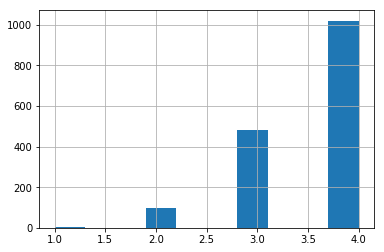

In [22]:
training_data_df[BEST_EPOCH].hist()

In [23]:
training_data_df[TOTAL_DURATION].describe()

count    1600.000000
mean      299.743750
std        17.579996
min       257.000000
25%       289.000000
50%       294.000000
75%       315.000000
max       457.000000
Name: Total_Duration(s), dtype: float64

In [24]:
training_data_df.groupby([TRAINING_NUMBER]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Training_Number,,,,,,,,
5,160.0,0.804402,0.007738,0.779928,0.799171,0.804302,0.810339,0.819863
6,160.0,0.803683,0.009220,0.754138,0.799246,0.806634,0.809524,0.816821
2,160.0,0.802787,0.007398,0.779990,0.800078,0.804232,0.808057,0.813894
1,160.0,0.801901,0.008532,0.778827,0.796391,0.802306,0.808162,0.821631
8,160.0,0.801743,0.009598,0.770750,0.797862,0.804290,0.808104,0.819102
0,160.0,0.800668,0.008669,0.779019,0.795045,0.799596,0.807110,0.823231
4,160.0,0.800608,0.008018,0.780123,0.795337,0.800404,0.806507,0.818577
7,160.0,0.800235,0.006807,0.768128,0.797056,0.802150,0.804971,0.812745
3,160.0,0.798679,0.007572,0.764852,0.794442,0.799663,0.804275,0.813198


In [25]:
rp.summary_cont(training_data_df[TEST_F1_MEASURE])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Test_F1_Measure,1600.0,0.801037,0.008422,0.000211,0.800624,0.80145


In [26]:
rp.summary_cont(training_data_df.groupby(EMBEDDING))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Embedding,,,,,,
No,200,0.800447,0.007354,0.000520,0.799428,0.801466
fasttext,400,0.796664,0.008533,0.000427,0.795828,0.797500
glove,200,0.803377,0.007074,0.000500,0.802396,0.804357
wang2vec,400,0.803049,0.007814,0.000391,0.802283,0.803815
word2vec,400,0.802524,0.008374,0.000419,0.801703,0.803344


In [27]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

def print_anova(parameter):
    # Fits the model with the interaction term
    # This will also automatically include the main effects for each factor
    model = ols('Test_F1_Measure ~ C({0})'.format(parameter), training_data_df).fit()
    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .20f}")
    print(model.summary())
    res = sm.stats.anova_lm(model, typ= 2)
    print(res)
    print(anova_table(res))
    mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[parameter])
    mc_results = mc.tukeyhsd()
    print(mc_results)

In [28]:
print_anova(EMBEDDING)

Overall model F( 4, 1595) =  44.193, p =  0.00000000000000000000
                            OLS Regression Results                            
Dep. Variable:        Test_F1_Measure   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           3.18e-35
Time:                        18:34:47   Log-Likelihood:                 5457.2
No. Observations:                1600   AIC:                        -1.090e+04
Df Residuals:                    1595   BIC:                        -1.088e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [29]:
training_data_df[(training_data_df.Embedding == 'wang2vec') & (training_data_df.Embedding_Type == 'skip') & (training_data_df.Representation == 'ELMo+Embeddings')]

,Training_ID,Model,Representation,Embedding,Embedding_Type,Training_Number,Execution_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
623,harem-ft_ELMo+Embeddings_wang2vec_skip_0_1,harem-ft,ELMo+Embeddings,wang2vec,skip,0,1,3,5,00:04:49,289.0,57.8,0.990014,0.990842,0.891958,0.879450,0.885660,21.735507,0.978582,0.980767,0.782609,0.826531,0.803970,52.781643,0.977396,0.979122,0.797544,0.802337,0.799933,55.715600
624,harem-ft_ELMo+Embeddings_wang2vec_skip_0_2,harem-ft,ELMo+Embeddings,wang2vec,skip,0,2,4,5,00:04:54,294.0,58.8,0.990137,0.990943,0.894507,0.882686,0.888557,21.823321,0.976287,0.978144,0.796526,0.818878,0.807547,55.925516,0.977606,0.979332,0.822022,0.792654,0.807071,57.284149
625,harem-ft_ELMo+Embeddings_wang2vec_skip_0_3,harem-ft,ELMo+Embeddings,wang2vec,skip,0,3,4,5,00:04:50,290.0,58.0,0.990003,0.990798,0.889434,0.880798,0.885095,21.545571,0.976177,0.978035,0.789216,0.821429,0.805000,58.763950,0.977396,0.979107,0.817406,0.799666,0.808439,56.905376
626,harem-ft_ELMo+Embeddings_wang2vec_skip_0_4,harem-ft,ELMo+Embeddings,wang2vec,skip,0,4,3,5,00:04:52,292.0,58.4,0.989477,0.990316,0.883519,0.877562,0.880530,22.255353,0.978472,0.980876,0.785888,0.823980,0.804483,52.638710,0.977966,0.979692,0.807783,0.804007,0.805890,56.347250
627,harem-ft_ELMo+Embeddings_wang2vec_skip_1_0,harem-ft,ELMo+Embeddings,wang2vec,skip,1,0,4,5,00:04:25,265.0,53.0,0.989416,0.990286,0.884365,0.876513,0.880422,22.802176,0.986756,0.987851,0.860526,0.853786,0.857143,31.248006,0.978311,0.980083,0.832459,0.794658,0.813119,57.530689
628,harem-ft_ELMo+Embeddings_wang2vec_skip_1_1,harem-ft,ELMo+Embeddings,wang2vec,skip,1,1,4,5,00:04:50,290.0,58.0,0.989438,0.990377,0.885598,0.876782,0.881168,22.635752,0.986756,0.987751,0.861619,0.861619,0.861619,31.301906,0.977471,0.979272,0.818431,0.797663,0.807913,58.465097
629,harem-ft_ELMo+Embeddings_wang2vec_skip_1_2,harem-ft,ELMo+Embeddings,wang2vec,skip,1,2,4,5,00:04:59,299.0,59.8,0.989732,0.990580,0.890038,0.879742,0.884860,22.555989,0.987353,0.988449,0.876963,0.874674,0.875817,31.218131,0.977396,0.979227,0.818780,0.788982,0.803605,58.423296
630,harem-ft_ELMo+Embeddings_wang2vec_skip_1_3,harem-ft,ELMo+Embeddings,wang2vec,skip,1,3,4,5,00:04:50,290.0,58.0,0.989438,0.990298,0.889435,0.876513,0.882927,23.073157,0.986357,0.987453,0.866142,0.861619,0.863874,31.042089,0.977021,0.978882,0.818213,0.785977,0.801771,58.314630
631,harem-ft_ELMo+Embeddings_wang2vec_skip_1_4,harem-ft,ELMo+Embeddings,wang2vec,skip,1,4,3,5,00:04:51,291.0,58.2,0.989891,0.990818,0.890914,0.881087,0.885973,22.392685,0.988349,0.989345,0.863402,0.874674,0.869001,29.819369,0.978371,0.980083,0.818025,0.793990,0.805829,54.303022
632,harem-ft_ELMo+Embeddings_wang2vec_skip_2_0,harem-ft,ELMo+Embeddings,wang2vec,skip,2,0,4,5,00:04:27,267.0,53.4,0.989426,0.990243,0.882255,0.875448,0.878838,21.512400,0.981118,0.982076,0.825651,0.874735,0.849485,42.266657,0.977126,0.978987,0.818651,0.794324,0.806304,57.323438
